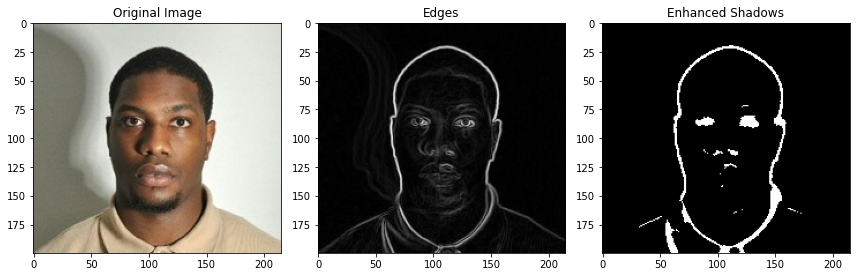

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology

def detect_shadows(image_path):
    # Load the image
    image = io.imread(image_path)

    # Convert the image to grayscale
    grayscale = np.mean(image, axis=2)

    # Apply an edge detection filter
    edges = filters.sobel(grayscale)

    # Apply thresholding to obtain a binary image
    threshold = filters.threshold_otsu(edges)
    binary = edges > threshold

    # Perform morphological operations to enhance the shadow regions
    kernel = morphology.disk(3)
    enhanced = morphology.closing(binary, kernel)

    # Display the original image, the edges, and the enhanced shadow regions
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title('Original Image')

    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Edges')

    ax[2].imshow(enhanced, cmap='gray')
    ax[2].set_title('Enhanced Shadows')

    plt.tight_layout()
    plt.show()

# Provide the path to your image
image_path = "C:/air_ticket/shadow_visa.jpg"
detect_shadows(image_path)
